In [1]:

import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import copy


In [2]:

def plot_graph_with_path(G, pos, path, title="Grafo Residual"):
    plt.figure(figsize=(10, 6))

    # Cores padrão
    edge_colors = []
    edge_labels = {}
    for u, v in G.edges():
        color = 'gray'
        if (u, v) in path:
            color = 'red'
        elif (v, u) in path:
            color = 'blue'
        edge_colors.append(color)
        edge_labels[(u, v)] = f"{G[u][v]['flow']}/{G[u][v]['capacity']}"

    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, edge_color=edge_colors, width=2, edge_cmap="viridis")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.show()


In [3]:

def bfs(G, source, sink, parent):
    visited = {node: False for node in G.nodes()}
    queue = deque()
    queue.append(source)
    visited[source] = True

    while queue:
        u = queue.popleft()
        for v in G.neighbors(u):
            if not visited[v] and G[u][v]['capacity'] - G[u][v]['flow'] > 0:
                queue.append(v)
                visited[v] = True
                parent[v] = u
                if v == sink:
                    return True
    return False


In [4]:

def edmonds_karp_colored(G, source, sink):
    pos = nx.spring_layout(G, seed=42)
    max_flow = 0
    parent = {}

    for u, v in G.edges():
        G[u][v]['flow'] = 0

    iteration = 1
    while bfs(G, source, sink, parent):
        path_flow = float('inf')
        s = sink
        path = []
        while s != source:
            path.insert(0, (parent[s], s))
            path_flow = min(path_flow, G[parent[s]][s]['capacity'] - G[parent[s]][s]['flow'])
            s = parent[s]

        v = sink
        while v != source:
            u = parent[v]
            G[u][v]['flow'] += path_flow
            if G.has_edge(v, u):
                G[v][u]['flow'] -= path_flow
            else:
                G.add_edge(v, u, capacity=0, flow=-path_flow)
            v = parent[v]

        max_flow += path_flow
        plot_graph_with_path(copy.deepcopy(G), pos, path, title=f"Grafo Residual após aumento de fluxo #{iteration}")
        iteration += 1

    return max_flow


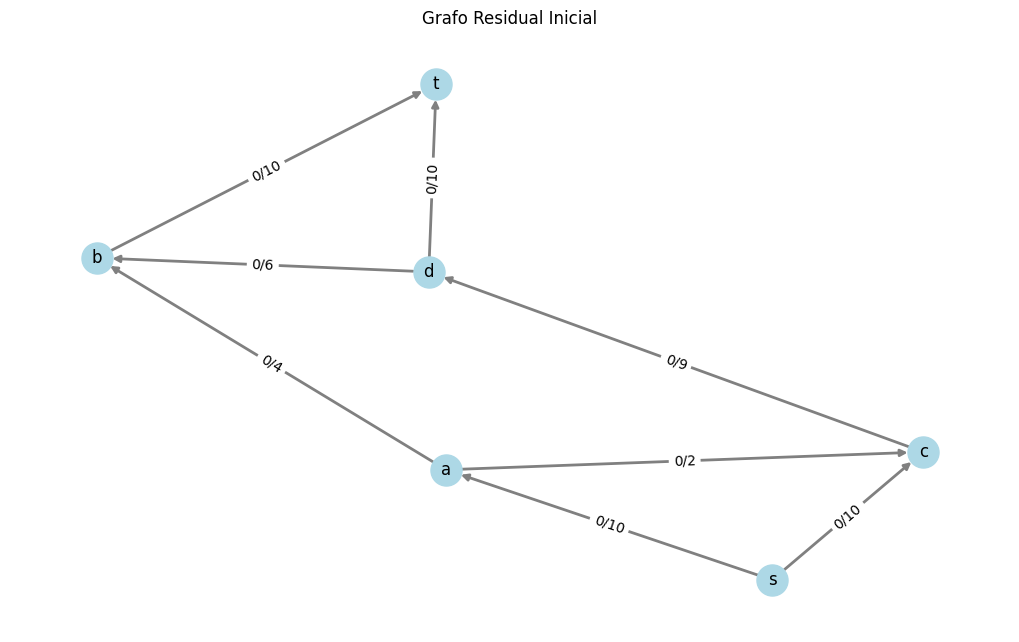

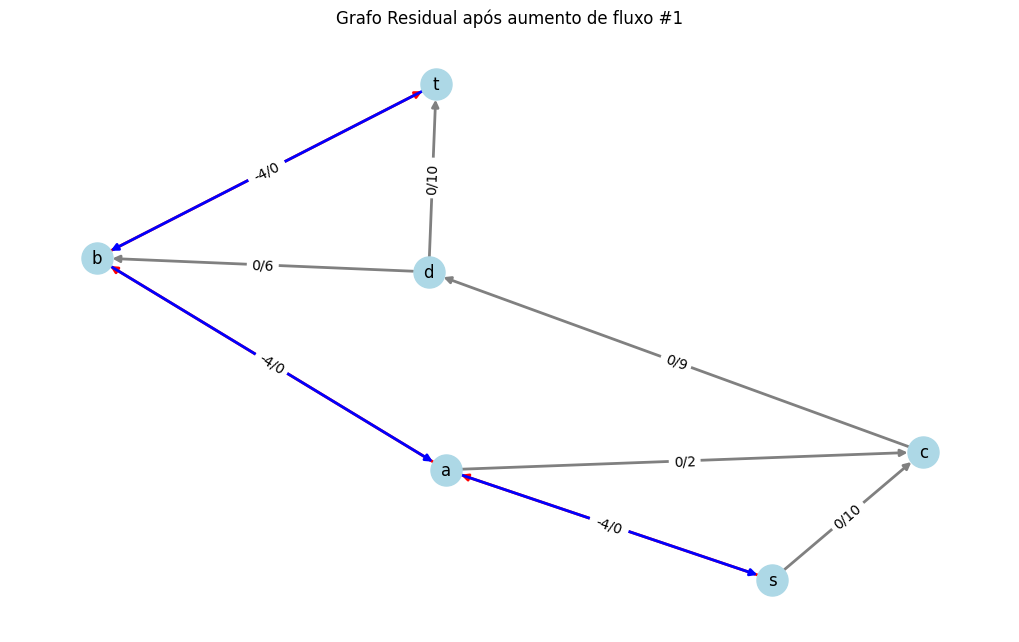

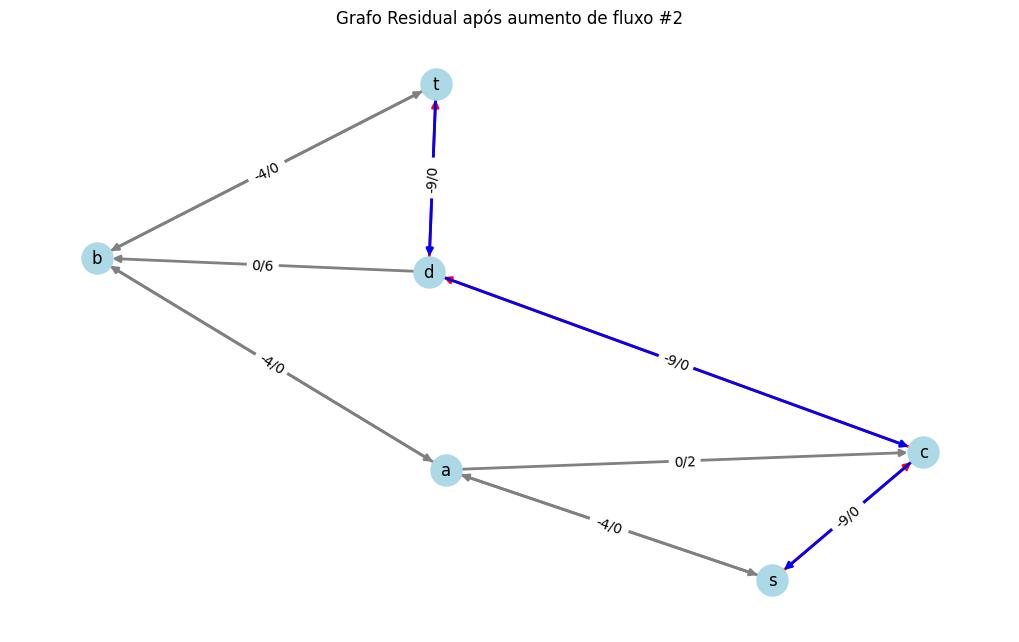

Fluxo máximo: 13


In [5]:

G = nx.DiGraph()
edges = [
    ('s', 'a', 10), ('s', 'c', 10),
    ('a', 'b', 4), ('a', 'c', 2), ('c', 'd', 9),
    ('b', 't', 10), ('d', 'b', 6), ('d', 't', 10)
]

for u, v, capacity in edges:
    G.add_edge(u, v, capacity=capacity,flow=0)

path = []
pos = nx.spring_layout(G, seed=42)

plot_graph_with_path(copy.deepcopy(G), pos, path, title=f"Grafo Residual Inicial")

max_flow_colored = edmonds_karp_colored(G, 's', 't')
print(f"Fluxo máximo: {max_flow_colored}")


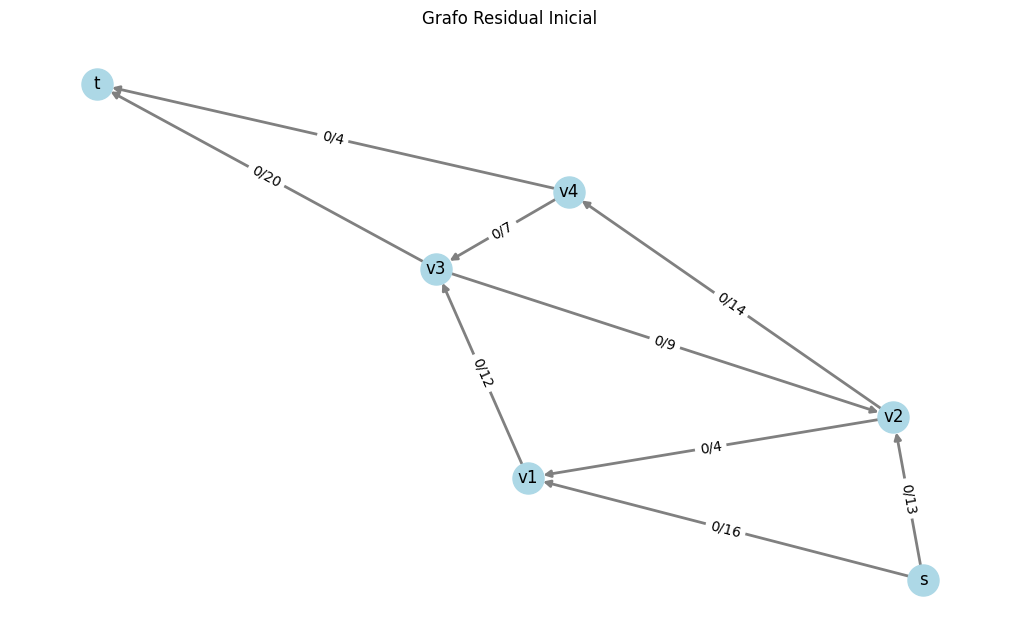

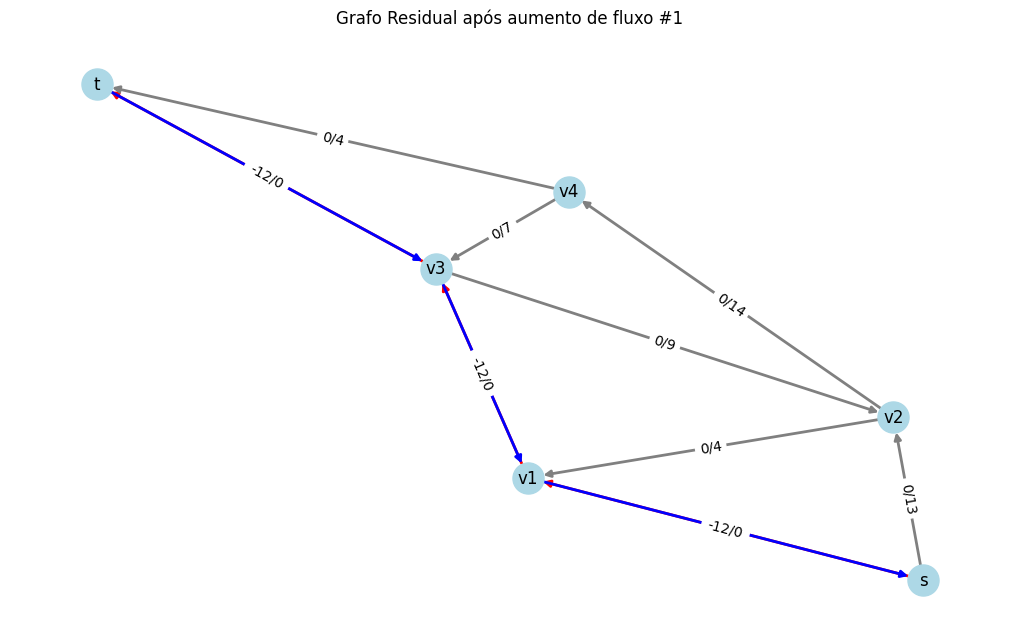

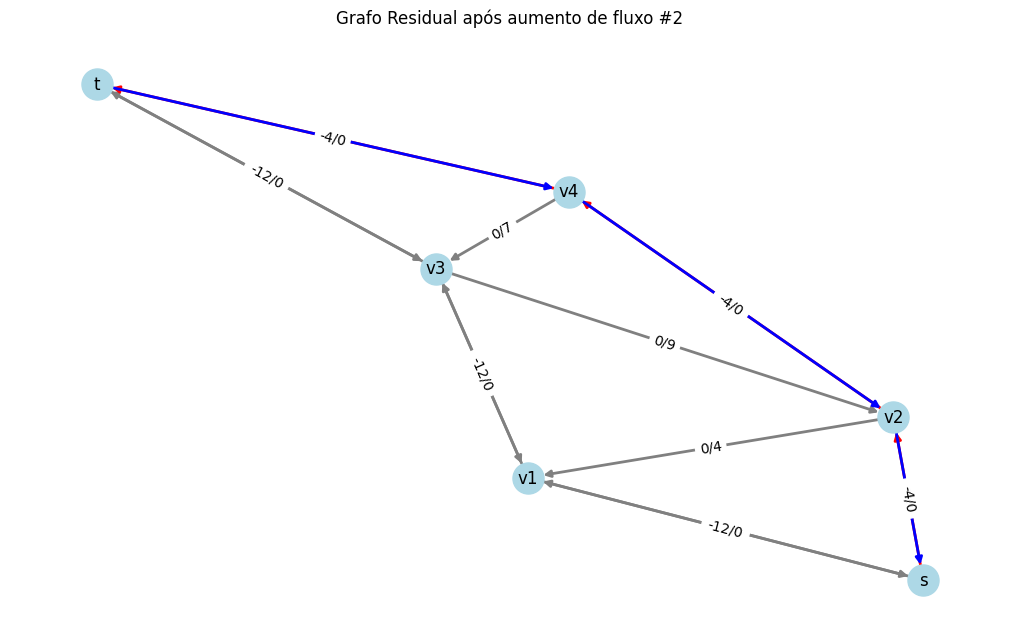

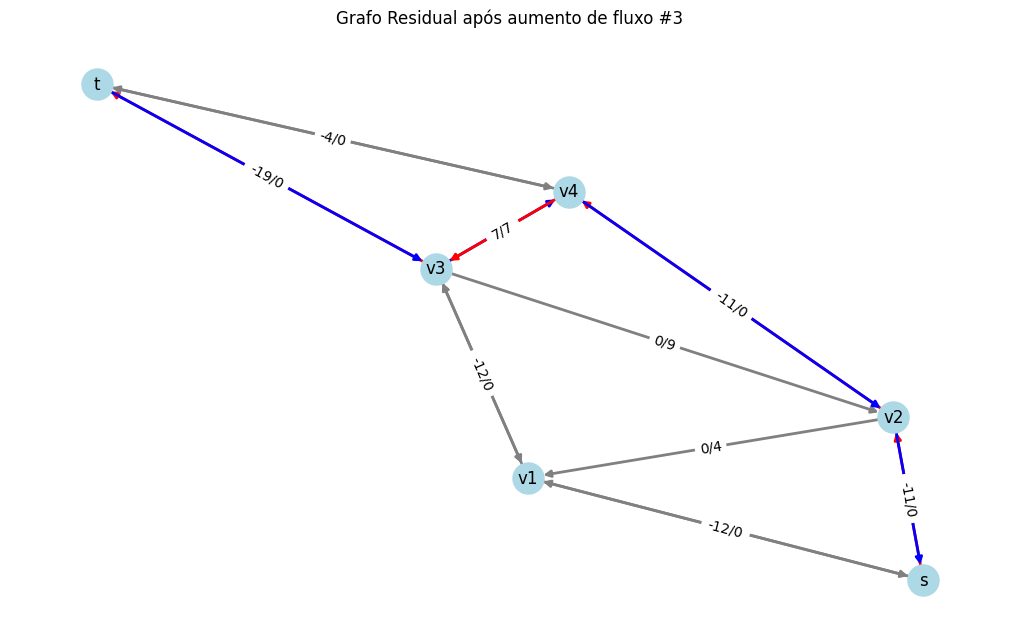

Fluxo máximo: 23


In [6]:
G = nx.DiGraph()
edges = [
    ('s', 'v1', 16), ('s', 'v2', 13),
    ('v1', 'v3', 12), ('v2', 'v1', 4), ('v2', 'v4', 14),
    ('v3', 'v2', 9), ('v3', 't', 20), ('v4', 'v3', 7),
    ('v4','t',4)
]

for u, v, capacity in edges:
    G.add_edge(u, v, capacity=capacity, flow=0)

path = []
pos = nx.spring_layout(G, seed=42)

plot_graph_with_path(copy.deepcopy(G), pos, path, title=f"Grafo Residual Inicial")

max_flow_colored = edmonds_karp_colored(G, 's', 't')
print(f"Fluxo máximo: {max_flow_colored}")


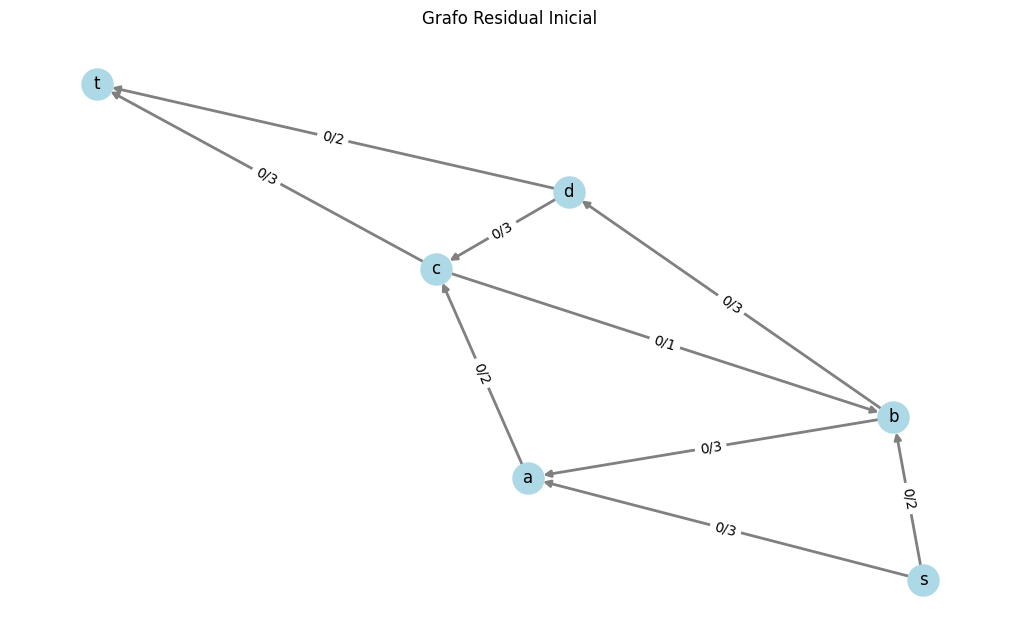

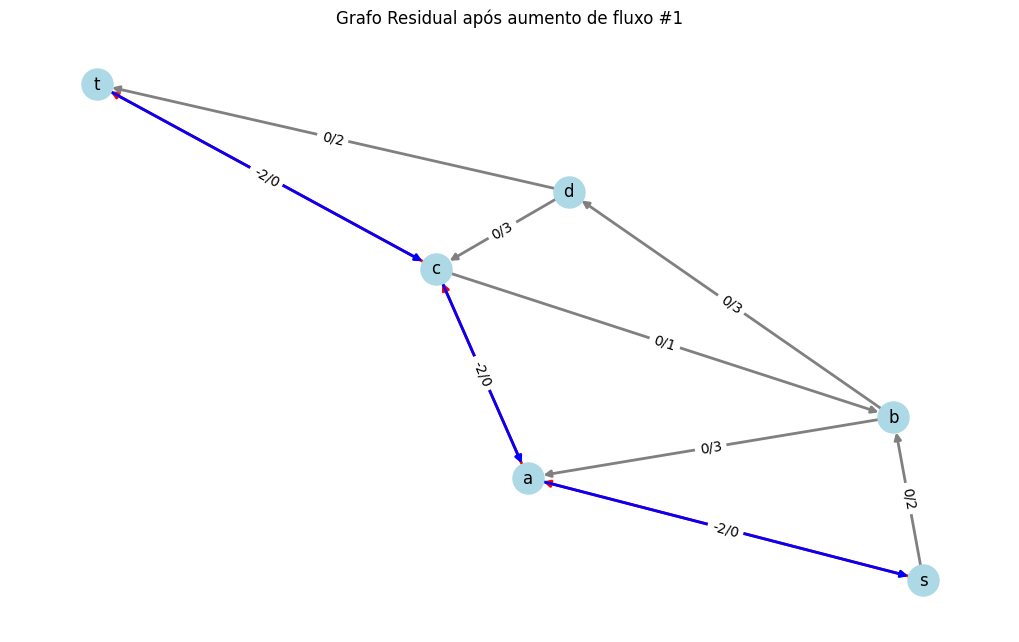

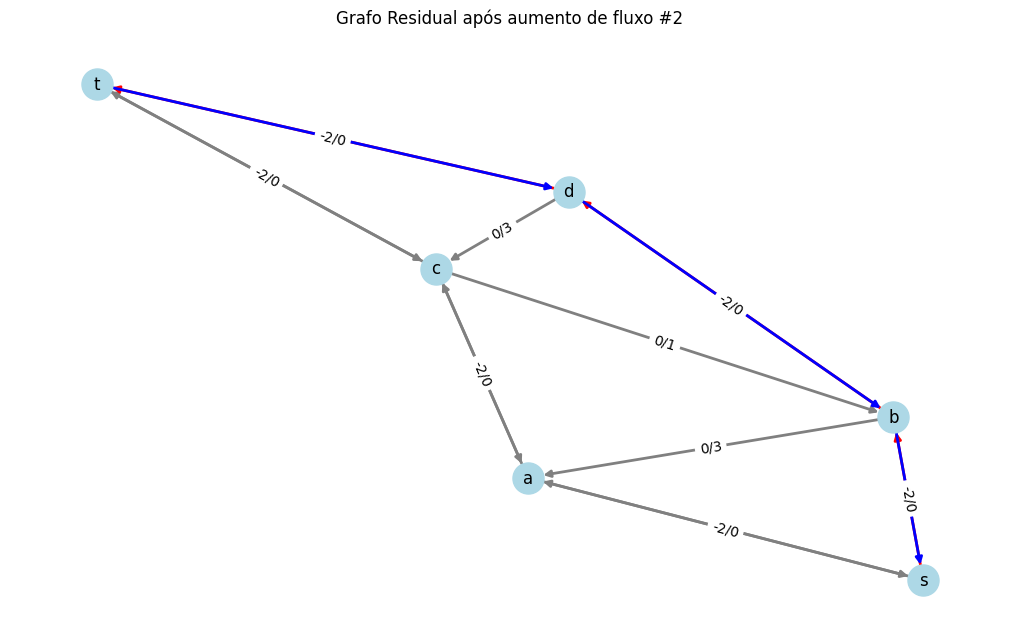

Fluxo máximo: 4


In [7]:
G = nx.DiGraph()
edges = [
    ('s', 'a', 3), ('s', 'b', 2),
    ('a', 'c', 2), ('b', 'a', 3), ('b', 'd', 3),
    ('c', 'b', 1), ('c', 't', 3), ('d', 'c', 3),
    ('d','t',2)
]

for u, v, capacity in edges:
    G.add_edge(u, v, capacity=capacity, flow=0)

path = []
pos = nx.spring_layout(G, seed=42)

plot_graph_with_path(copy.deepcopy(G), pos, path, title=f"Grafo Residual Inicial")

max_flow_colored = edmonds_karp_colored(G, 's', 't')
print(f"Fluxo máximo: {max_flow_colored}")
